In [19]:
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

import scipy,sklearn,pylab
from scipy import io

from sklearn import model_selection,covariance
from sklearn.model_selection import train_test_split,KFold


In [20]:
matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'
matplotlib.rcParams['figure.figsize'] = (18,16)


# 2

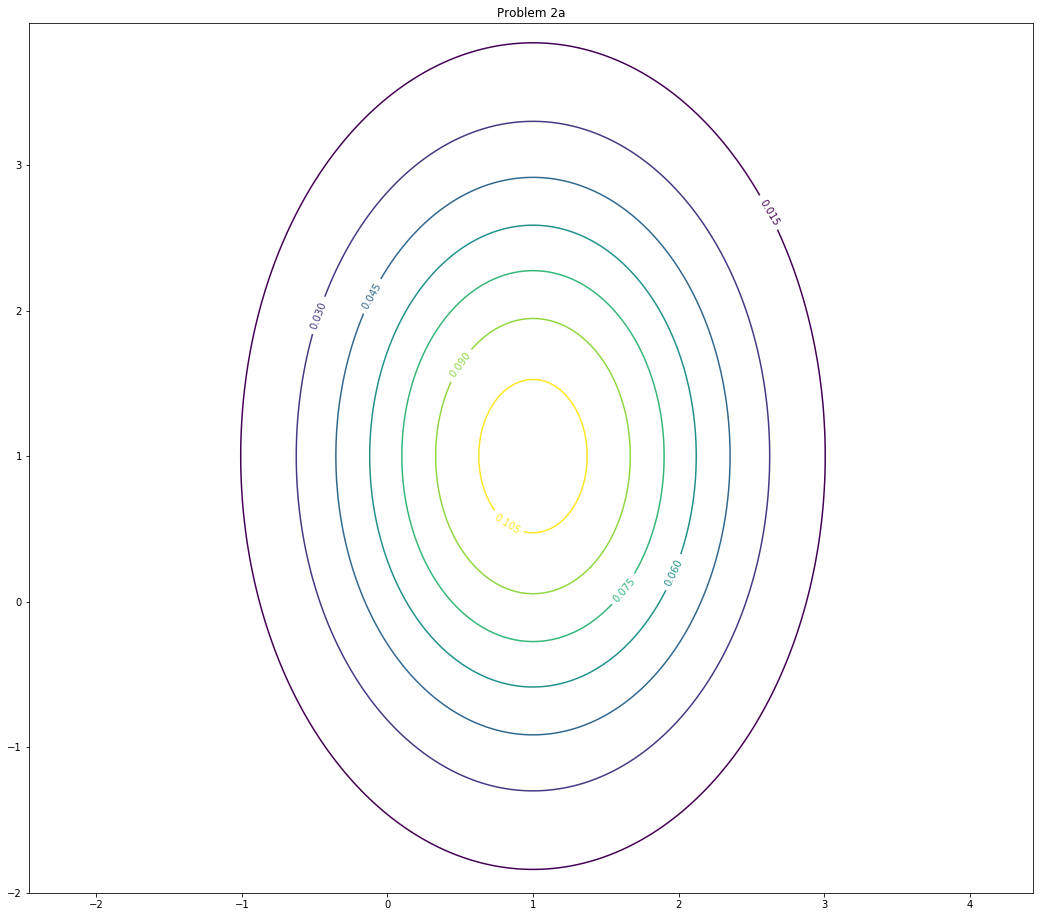

In [21]:
delta = 0.025
x = np.arange(-2.0, 4.0, delta)
y = np.arange(-2.0, 4.0, delta)
X, Y = np.meshgrid(x, y)
Za = mlab.bivariate_normal(X, Y, 1.0, np.sqrt(2), 1.0, 1.0, 0.0)

plt.figure()
CS = plt.contour(X, Y, Za,10)

plt.clabel(CS, inline=1, fontsize=10)
plt.axis('equal')
plt.title('Problem 2a')
plt.show()

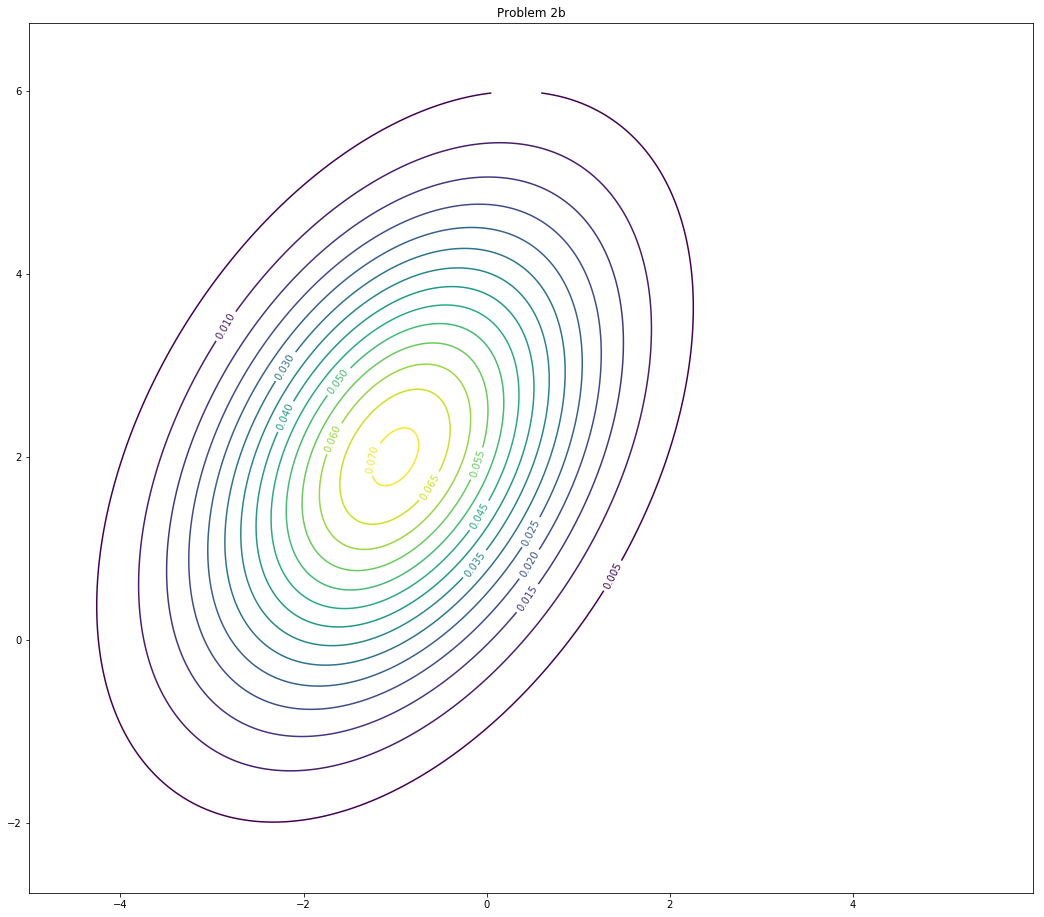

In [22]:
delta = 0.025
x = np.arange(-5.0, 6.0, delta)
y = np.arange(-2.0, 6.0, delta)
X, Y = np.meshgrid(x, y)
Zb = mlab.bivariate_normal(X, Y, np.sqrt(2), np.sqrt(3), -1.0, 2.0, 1.0)

plt.figure()
CS = plt.contour(X, Y, Zb,15)
plt.clabel(CS, inline=1, fontsize=10)
plt.axis('equal')
plt.title('Problem 2b')
plt.show()

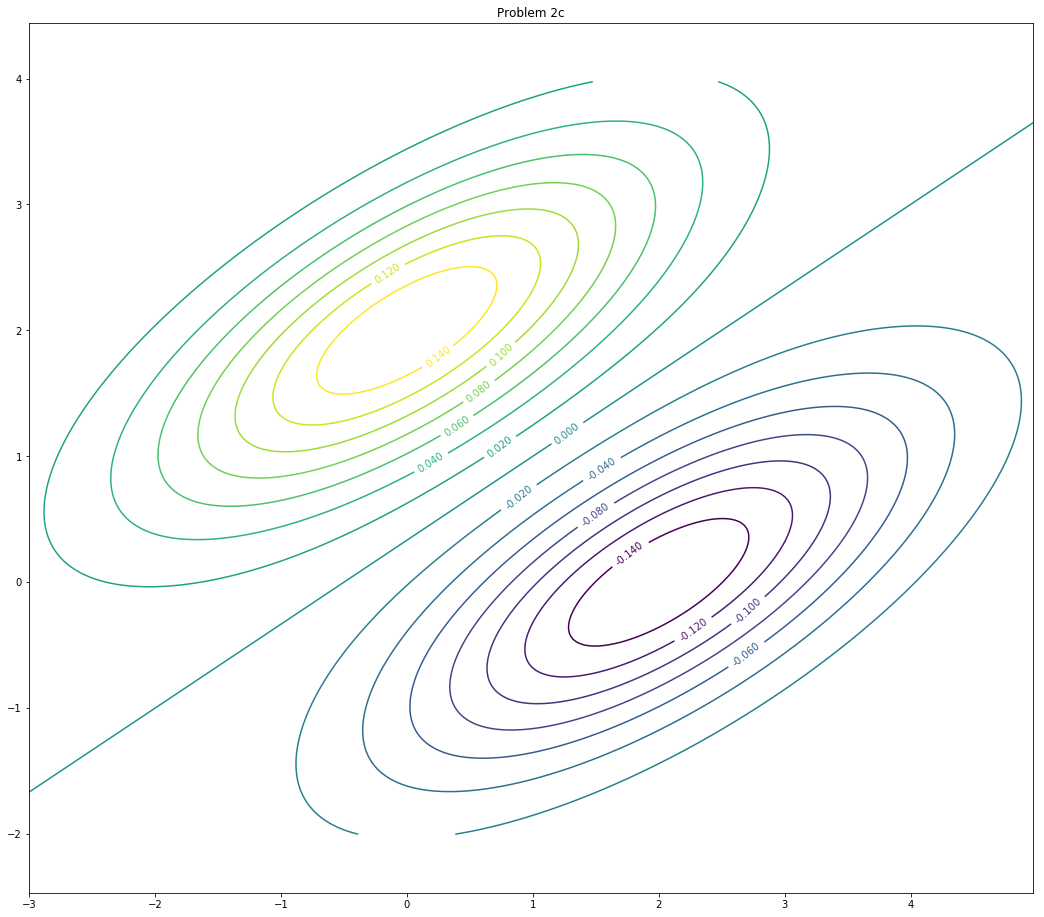

In [23]:
delta = 0.025
x = np.arange(-3.0, 5.0, delta)
y = np.arange(-2.0, 4.0, delta)
X, Y = np.meshgrid(x, y)
Zc1 = mlab.bivariate_normal(X, Y, np.sqrt(2), 1, 0.0, 2.0, 1.0)

Zc2 = mlab.bivariate_normal(X, Y, np.sqrt(2), 1, 2.0, 0.0, 1.0)

Zc = Zc1-Zc2

plt.figure()
CS = plt.contour(X, Y, Zc,15)
plt.clabel(CS, inline=1, fontsize=10)
plt.axis('equal')
plt.title('Problem 2c')
plt.show()

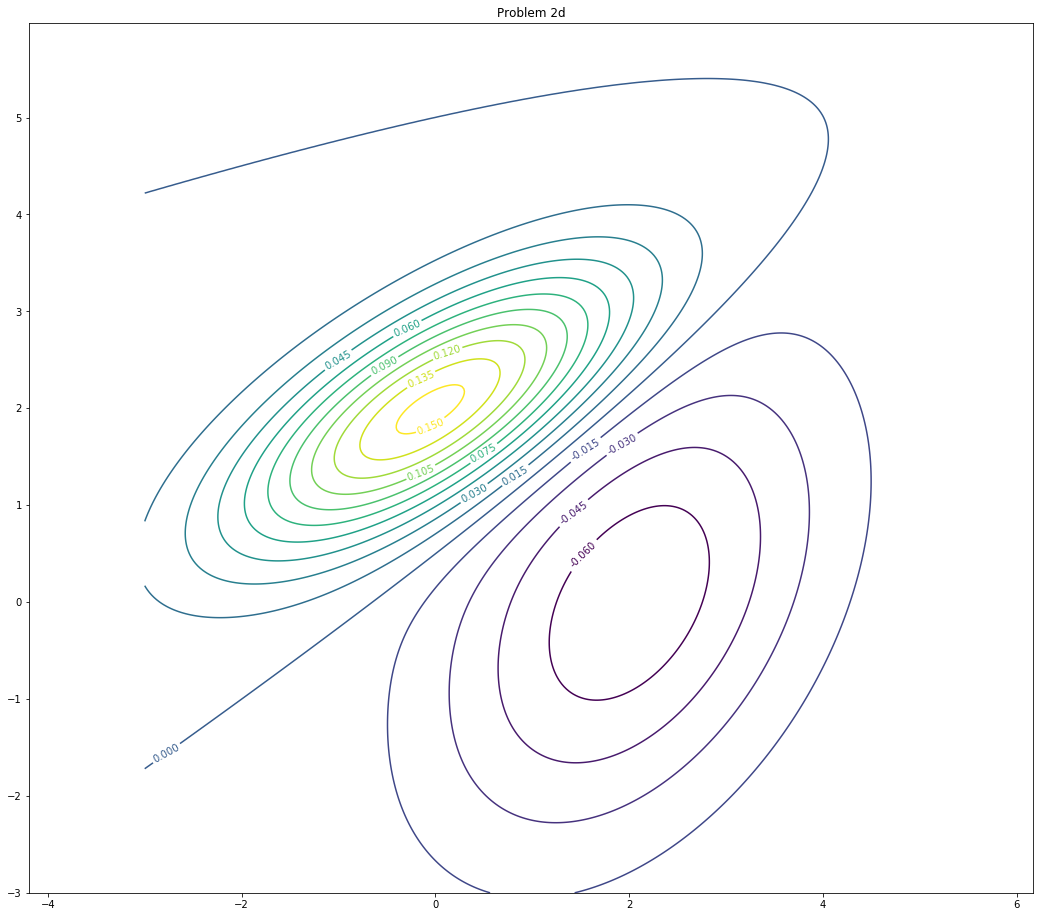

In [24]:
delta = 0.025
x = np.arange(-3.0, 5.0, delta)
y = np.arange(-3.0, 6.0, delta)
X, Y = np.meshgrid(x, y)
Zd1 = mlab.bivariate_normal(X, Y, np.sqrt(2), 1, 0.0, 2.0, 1.0)

Zd2 = mlab.bivariate_normal(X, Y, np.sqrt(2), np.sqrt(3), 2.0, 0.0, 1.0)

Zd = Zd1-Zd2

plt.figure()
CS = plt.contour(X, Y, Zd,15)
plt.clabel(CS, inline=1, fontsize=10)
plt.axis('equal')
plt.title('Problem 2d')
plt.show()

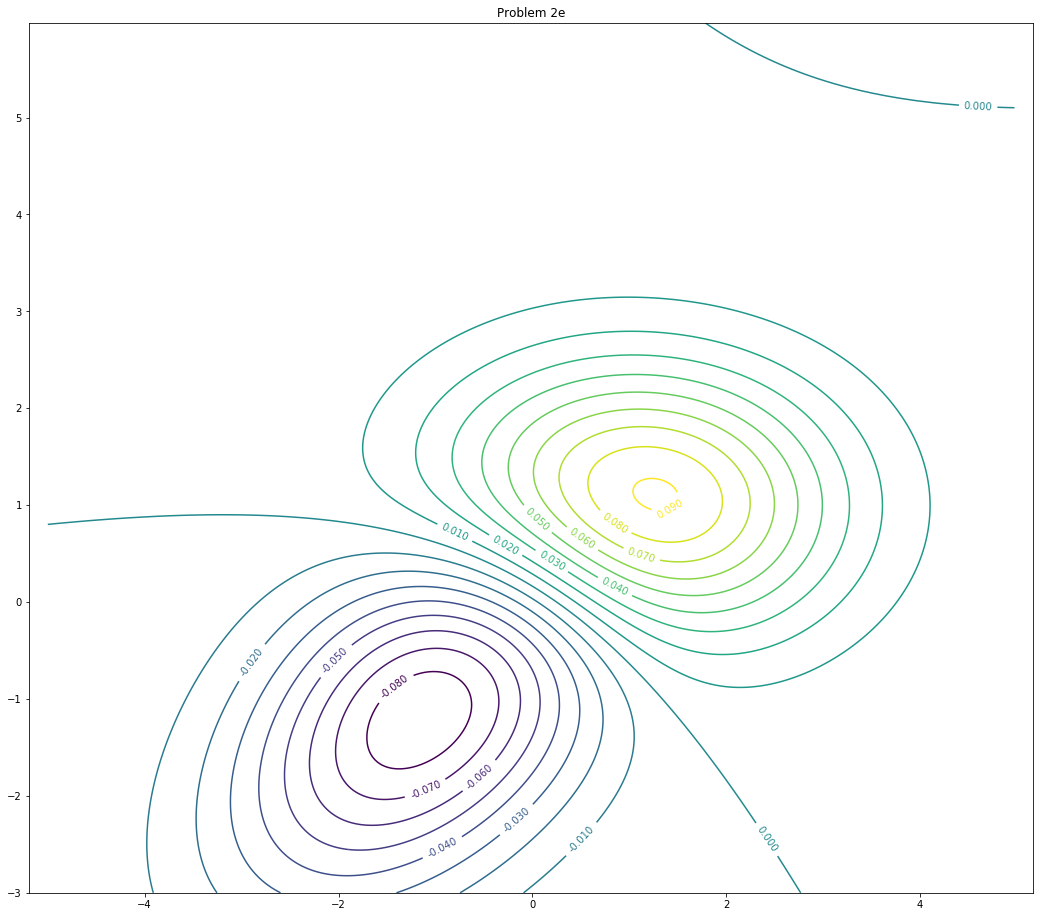

In [25]:
delta = 0.025
x = np.arange(-5.0, 5.0, delta)
y = np.arange(-3.0, 6.0, delta)
X, Y = np.meshgrid(x, y)
Ze1 = mlab.bivariate_normal(X, Y, np.sqrt(2), 1, 1.0, 1.0, 0.0)

Ze2 = mlab.bivariate_normal(X, Y, np.sqrt(2), np.sqrt(2), -1.0, -1.0, 1.0)

Ze = Ze1-Ze2

plt.figure()
CS = plt.contour(X, Y, Ze,20)
plt.clabel(CS, inline=1, fontsize=10)
plt.axis('equal')
plt.title('Problem 2e')
plt.show()

# 3

In [69]:
x1 =np.random.normal(3,3,(1,100))
x2 = 0.5*x1 + np.random.normal(4,2,(1,100))
mu1 = np.mean(x1)
mu2 = np.mean(x2)

In [70]:
mu1,mu2

(3.1823691743816611, 5.5957649123260182)

In [71]:
X3 = np.concatenate((x1,x2))
cov=np.cov(X3,bias=True)
cov

array([[ 9.38813091,  5.39845662],
       [ 5.39845662,  6.87265662]])

In [72]:
egval,egvec = np.linalg.eigh(cov)
egval


array([  2.5873588 ,  13.67342873])

In [73]:
egvec

array([[ 0.62172982, -0.78323179],
       [-0.78323179, -0.62172982]])

In [76]:
egvec1 = egvec[:,0]*egval[0]
egvec2 = egvec[:,1]*egval[1]

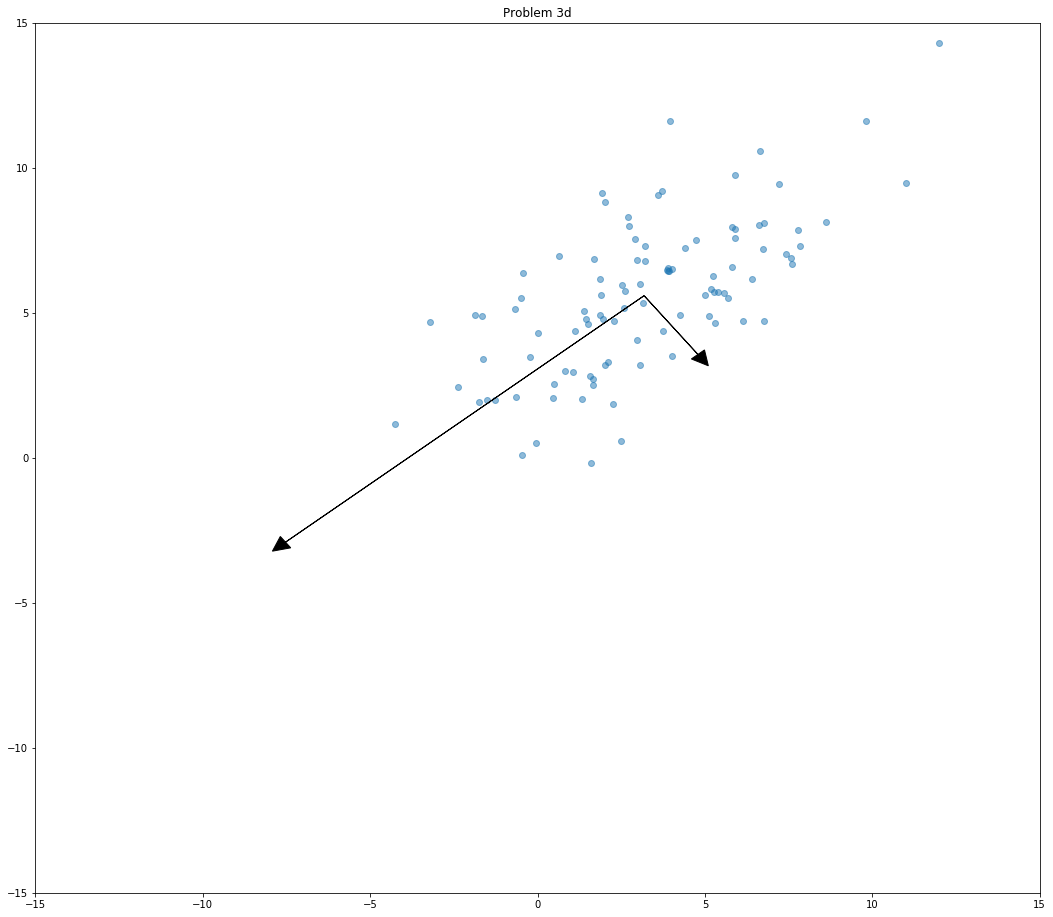

In [77]:
plt.scatter(x1,x2, alpha = 0.5)
plt.title("Problem 3d")
ax = plt.axes()
ax.arrow(mu1, mu2,egvec1[0],egvec1[1],
         head_width=0.5, head_length=0.5, fc='k', ec='k')
ax.arrow(mu1, mu2,egvec2[0],egvec2[1],
         head_width=0.5, head_length=0.5, fc='k', ec='k')
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.show()

In [78]:
mu3 = np.array(([mu1],[mu2]))
mu3

array([[ 3.18236917],
       [ 5.59576491]])

In [79]:
xrot = np.matmul(egvec[:,::-1].T,X3-mu3)
#xrot

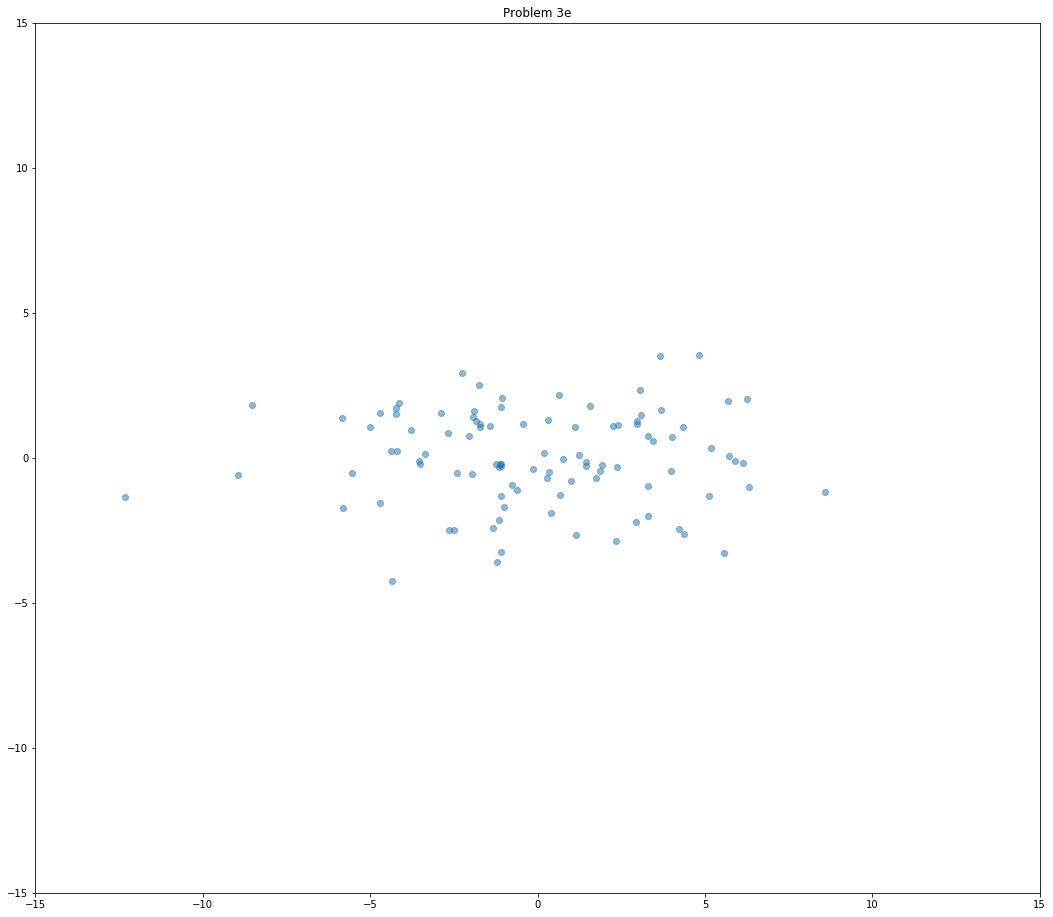

In [80]:
plt.scatter(xrot[0,:],xrot[1,:], alpha = 0.5)
plt.title("Problem 3e")
ax = plt.axes()
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.show()

# 6

In [81]:
mnist= scipy.io.loadmat(
    "hw3_mnist_dist/hw3_mnist_dist/train")

In [82]:
mnist_data=mnist['trainX']
mnist_data_norm =sklearn.preprocessing.normalize(
    mnist_data[:,0:-1].astype(float))
#mnist_data_norm.shape
#mnist_data[:,-1:].shape

In [88]:
mnist_means = [np.mean(
    mnist_data_norm[mnist_data[:,-1]==k],
    0) for k in range(10)]
#mnist_means omitted, for space reasons

In [89]:
mnist_covs = [np.cov(
    mnist_data_norm[mnist_data[:,-1]==k],
    rowvar=False,bias=True) for k in range(10)]
#mnist_covs omitted for space reasons

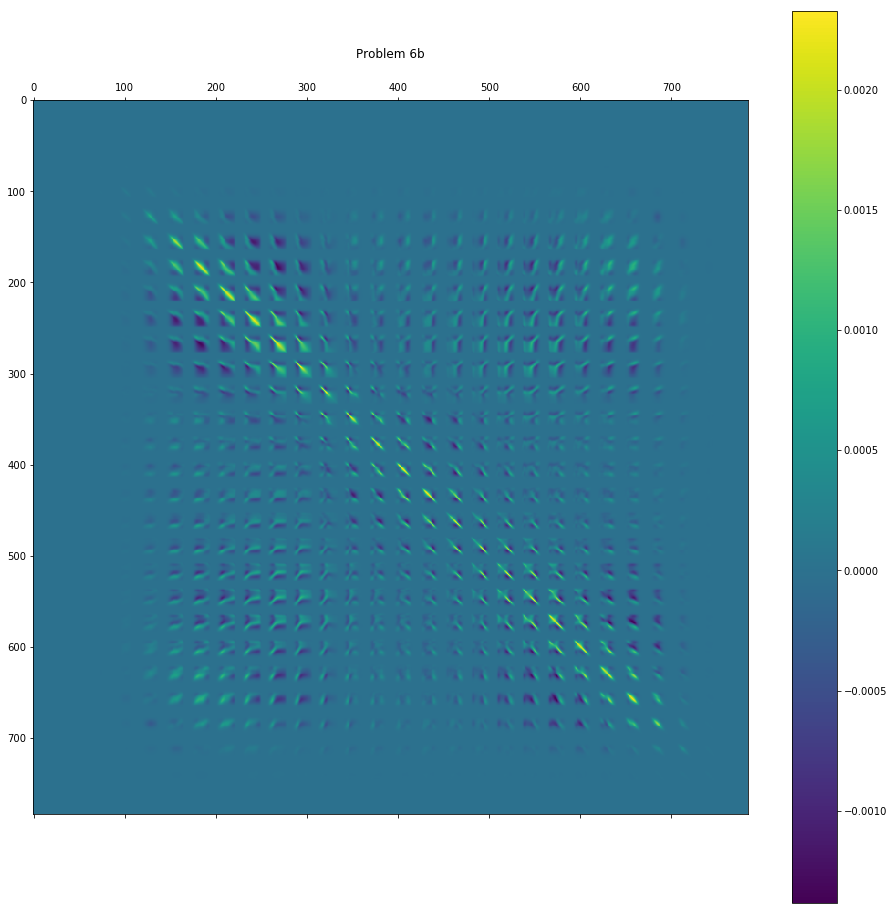

In [85]:
plt.matshow(mnist_covs[5])
plt.colorbar()
plt.title('Problem 6b')
plt.show()


In [41]:
class lda(object):   
    def __init__(self, data,labels):
        self.ulabel=np.unique(labels)
        self.means = {k:np.mean(
            data[labels==k],0) for k in self.ulabel}
        self.cov = np.mean(
            np.array(
                [np.cov(
                    data[labels==k],rowvar=False,bias=True)
                 *(labels==k).sum() for k in self.ulabel]),0)
        self.pdfs = {k:scipy.stats.multivariate_normal(
            self.means[k],cov = self.cov,
            allow_singular=True) for k in self.ulabel}
        #print(self.means[0]==self.means[1])
        #print(self.means[0])
        self.covinv =scipy.linalg.pinvh(self.cov)
        self.lefts = {k:np.dot(
            self.means[k],self.covinv) for k in self.ulabel}
        #print(self.lefts[0]==self.lefts[1])
        self.rights = {k:0.5*(np.dot(
            self.means[k],
            self.covinv)* 
                              self.means[k].T).sum(0) for k in self.ulabel}
        #print(self.rights[0],self.rights[1])
        #self.discs ={k:(lambda x:((self.lefts[k] * x.T).sum(0) - self.rights[k])) for k in self.ulabel}
    
    def classify(self,point):
        #print((self.lefts[0] * np.zeros((784,)).T).sum(0) - self.rights[0])
        #print(max(self.ulabel, key = lambda k: (self.lefts[k] * point.T).sum(0) - self.rights[k]))
        return max(self.ulabel, key = lambda k: (
            self.lefts[k] * point.T).sum(0) - 
                   self.rights[k])
    def predict(self,vdata):
        return np.apply_along_axis(self.classify,1,vdata)
    def score(self,vdata,labels):        
        return np.count_nonzero(
            labels-self.predict(vdata))/labels.shape[0]

In [43]:
mnist_data_notnorm = mnist_data[:,0:-1].astype(float)
mnist_train, mnist_v, mnist_train_labels, mnist_v_labels = train_test_split(
    mnist_data_norm,mnist_data[:,-1:],test_size = 10000)
mnist_train_labels=mnist_train_labels.reshape(1,50000)[0,]
mnist_v_labels =mnist_v_labels.reshape(1,10000)[0,]

In [44]:
def find_error(x):
    train,label=sklearn.utils.resample(
        mnist_train,mnist_train_labels,replace=False,n_samples=x)
    return lda(train,label).score(mnist_v,mnist_v_labels)

In [45]:
xtrain =[100,200,500,1000,2000,5000,10000,30000,50000]
samples_error = [find_error(x) for x in xtrain]


In [86]:
samples_error_percent= [100*y for y in samples_error]
samples_error_percent

[29.32, 28.389999999999997, 65.12, 31.5, 19.97, 15.06, 13.59, 13.0, 12.65]

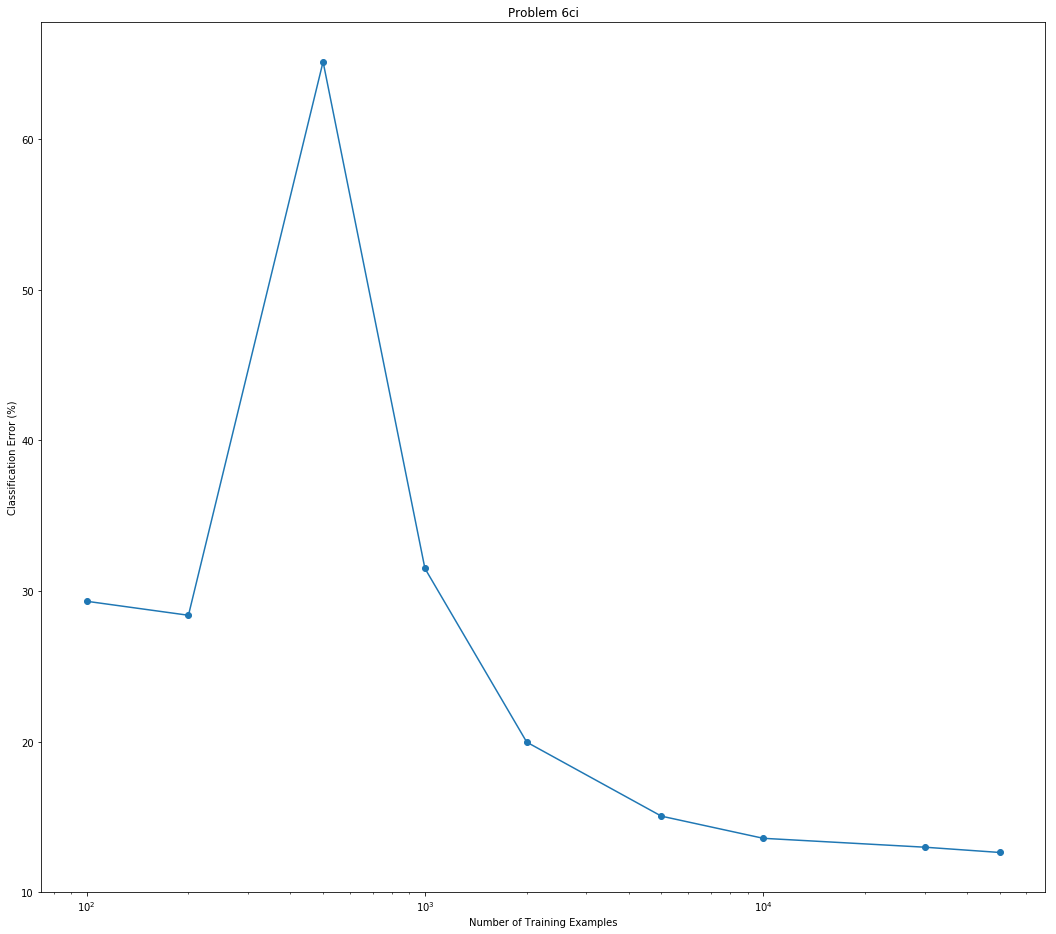

In [46]:
plt.plot(xtrain,samples_error_percent,marker ='o')
plt.xscale('log')
plt.title('Problem 6ci')
plt.ylabel("Classification Error (%)")
plt.xlabel("Number of Training Examples")
plt.show()

In [47]:
class qda(object): 
    def __init__(self, data,labels):
        self.ulabel=np.unique(labels)
        self.means = {k:np.mean(
            data[labels==k],0) for k in self.ulabel}
        self.covs = {k:np.cov(
            data[labels==k],
            rowvar=False,bias=True) for k in self.ulabel}
        self.pdfs = {k:scipy.stats.multivariate_normal(
            self.means[k],cov = self.covs[k],
            allow_singular=True) for k in self.ulabel}
    def classify(self,point):
        return max(self.ulabel, 
                   key = lambda k: self.pdfs[k].logpdf(point))
    def predict(self,vdata):
        return np.apply_along_axis(self.classify,1,vdata)
    def score(self,vdata,labels):        
        return np.count_nonzero(
            labels-self.predict(vdata))/labels.shape[0]
        

In [48]:
def find_error2(x):
    train,label=sklearn.utils.resample(
        mnist_train,mnist_train_labels,
        replace=False,n_samples=x,random_state=0)
    return qda(train,label).score(mnist_v,mnist_v_labels)


In [49]:
samples_error2 = [find_error2(x) for x in xtrain]

In [87]:
samples_error2_percent = [100*y for y in samples_error2]
samples_error2_percent

[90.79, 81.01, 56.3, 27.92, 26.06, 30.97, 23.98, 20.669999999999998, 19.34]

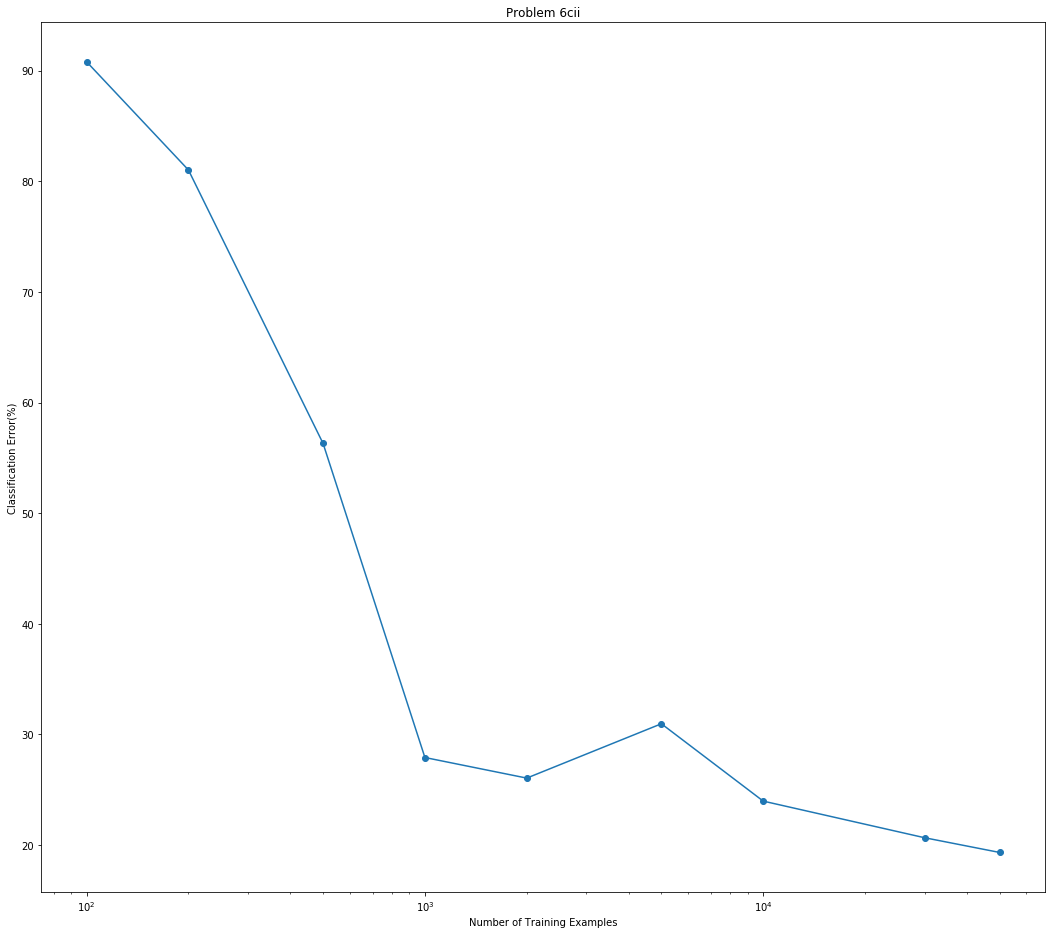

In [50]:
plt.plot(xtrain,samples_error2_percent,marker ='o')
plt.xscale('log')
plt.title('Problem 6cii')
plt.ylabel("Classification Error(%)")
plt.xlabel("Number of Training Examples")
plt.show()

In [51]:
mnist_test = scipy.io.loadmat("hw3_mnist_dist/hw3_mnist_dist/test")
#mnist_data_norm
   

In [52]:
def output_mnist(train, train_labels, test):
    out = lda(train,train_labels).predict(test)
    np.savetxt(
        "mnistkaggleout.csv", np.column_stack(
        (np.array(
            list(range(10000))),out)).astype(int), 
        fmt ="%i",delimiter = ",", 
        header = "Id,Category",comments = "")

In [53]:
#stolen from http://hanzratech.in/2015/02/24/handwritten-digit-recognition-using-opencv-sklearn-and-python.html
#features = mnist_data_norm
#import skimage
#from skimage.feature import hog
#list_hog_fd = [] 
#for feature in features: 
#    fd = hog(feature.reshape((28, 28)), orientations=9, pixels_per_cell=(14, 14), cells_per_block=(1, 1), visualise=False) 
#    list_hog_fd.append(fd) 
#mnist_hog_features = np.array(list_hog_fd, 'float64')

In [54]:
#mnist_hog_train, mnist_hog_v, mnist_hog_train_labels, mnist_hog_v_labels = train_test_split(mnist_hog_features,mnist_data[:,-1:],test_size = 10000)
#mnist_hog_train_labels=mnist_hog_train_labels.reshape(1,50000)[0,]
#mnist_hog_v_labels =mnist_hog_v_labels.reshape(1,10000)[0,]

In [55]:
#def find_error3(x):
#    train,label=sklearn.utils.resample(mnist_hog_train,mnist_hog_train_labels,replace=False,n_samples=x)
#    return lda(train,label).score(mnist_hog_v,mnist_hog_v_labels)

In [56]:
#xtrain =[100,200,500,1000,2000,5000,10000,30000,50000]
#samples_error3 = [find_error3(x) for x in xtrain]


In [57]:
#samples_error3_percent= [100*y for y in samples_error3]
#plt.plot(xtrain,samples_error3_percent,marker ='o')
#plt.xscale('log')
#plt.title('Problem 6ciii')
#plt.ylabel("Classification Error (%)")
#plt.xlabel("Number of Training Examples")
#plt.show()

In [58]:
#stolen from http://hanzratech.in/2015/02/24/handwritten-digit-recognition-using-opencv-sklearn-and-python.html
#features = mnist_test
#list_hog_fd_test = [] 
#for feature in features: 
#    fd = hog(feature.reshape((28, 28)), orientations=9, pixels_per_cell=(14, 14), cells_per_block=(1, 1), visualise=False) 
#    list_hog_fd.append(fd) 
#mnist_hog_test = np.array(list_hog_fd, 'float64')

In [59]:
output_mnist(mnist_data_norm,
             mnist_data[:,-1:].reshape(1,60000)[0,],
             sklearn.preprocessing.normalize(
                 mnist_test['testX'].astype(float)))

![minst](mnistkaggle.png)

In [60]:
spam= scipy.io.loadmat("hw3_spam_dist/dist/spam_data")
#spam

In [61]:
spam_norm = sklearn.preprocessing.normalize(
    spam['training_data'].astype(float))
#spam_norm.shape
#spam['test_data'].shape

In [62]:
spam_train_label = spam['training_labels']
#spam_train_label.reshape(1,23702)[0,].shape

In [63]:
def output_spam(train, train_labels, test):
    out = lda(train,train_labels).predict(test)
    np.savetxt(
        "spamkaggleout.csv", np.column_stack(
            (np.array(
                list(range(10000))),out)).astype(int), 
        fmt ="%i",delimiter = ",", 
        header = "Id,Category",comments = "")

In [64]:
output_spam(
    spam_norm,spam_train_label.reshape(1,23702)[0,],
    sklearn.preprocessing.normalize(
        spam['test_data'].astype(float)))

![spam](spamkaggle.png)

In [65]:
#spam_train, spam_v, spam_train_labels, spam_v_labels = train_test_split(mnist_data_norm,mnist_data[:,-1:],test_size = 10000, random_state = 0)
#mnist_train_labels=mnist_train_labels.reshape(1,50000)[0,]
#mnist_v_labels =mnist_v_labels.reshape(1,10000)[0,]

In [66]:
#rv =scipy.stats.multivariate_normal(cov = [[1,0],[0,0]],allow_singular=True)
#rv2 = scipy.stats.multivariate_normal([1,1],cov = [[1,0],[0,0]],allow_singular=True)

In [67]:
#rv.logpdf(np.array([0,0])) - rv2.logpdf(np.array([0,0]))


In [68]:
#scipy.linalg.pinvh([[1,0],[0,0]],return_rank=True)

In [ ]:
#(mnist_data[:,-1]==0).sum()

In [ ]:
#import scipy.stats._multivariate

In [ ]:
#z = scipy.stats._multivariate._PSD([[1,0],[0,0]],allow_singular=True)
#z2 = scipy.stats._multivariate._PSD([[1,0],[0,0]],allow_singular=True)

In [ ]:
#z.pinv


In [ ]:
#scipy.linalg.pinvh([[1,0],[0,0]])

In [ ]:
#dev = [0,0]
#maha = np.sum(np.square(np.dot(dev, z.U)), axis=-1)
#-0.5 * (z.rank * np.log(2*np.pi) + z.log_pdet + maha)

In [ ]:
#covinv =scipy.linalg.pinvh([[1,0],[0,1]])
#mu1 = np.array([0,0])
#left1 = np.dot(mu1,covinv)
#right1 = 0.5*(np.dot(mu1, covinv) * mu1.T).sum(0)
#disc = lambda x: (left1 * x.T).sum(0) - right1

In [ ]:
#covinv =scipy.linalg.pinvh([[1,0],[0,1]])
#mu2 = np.array([1,1])
#left = np.dot(mu2,covinv)
#right = 0.5*(np.dot(mu2, covinv) * mu2.T).sum(0)
#disc2 = lambda x: (left * x.T).sum(0) - right

In [ ]:
#(np.dot(np.array([0,0]), z.pinv) * np.array([0,0]).T).sum(0)-0.5*(np.dot(np.array([1,1]), z.pinv) * np.array([1,1]).T).sum(0)

In [ ]:
#disc(np.array([0,0]))

In [ ]:
#disc2(np.array([0.0,0.0]))

# Code

In [ ]:

# coding: utf-8

# In[19]:

import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

import scipy,sklearn,pylab
from scipy import io

from sklearn import model_selection,covariance
from sklearn.model_selection import train_test_split,KFold


# In[20]:

matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'
matplotlib.rcParams['figure.figsize'] = (18,16)


# # 2

# In[21]:

delta = 0.025
x = np.arange(-2.0, 4.0, delta)
y = np.arange(-2.0, 4.0, delta)
X, Y = np.meshgrid(x, y)
Za = mlab.bivariate_normal(X, Y, 1.0, np.sqrt(2), 1.0, 1.0, 0.0)

plt.figure()
CS = plt.contour(X, Y, Za,10)

plt.clabel(CS, inline=1, fontsize=10)
plt.axis('equal')
plt.title('Problem 2a')
plt.show()


# In[22]:

delta = 0.025
x = np.arange(-5.0, 6.0, delta)
y = np.arange(-2.0, 6.0, delta)
X, Y = np.meshgrid(x, y)
Zb = mlab.bivariate_normal(X, Y, np.sqrt(2), np.sqrt(3), -1.0, 2.0, 1.0)

plt.figure()
CS = plt.contour(X, Y, Zb,15)
plt.clabel(CS, inline=1, fontsize=10)
plt.axis('equal')
plt.title('Problem 2b')
plt.show()


# In[23]:

delta = 0.025
x = np.arange(-3.0, 5.0, delta)
y = np.arange(-2.0, 4.0, delta)
X, Y = np.meshgrid(x, y)
Zc1 = mlab.bivariate_normal(X, Y, np.sqrt(2), 1, 0.0, 2.0, 1.0)

Zc2 = mlab.bivariate_normal(X, Y, np.sqrt(2), 1, 2.0, 0.0, 1.0)

Zc = Zc1-Zc2

plt.figure()
CS = plt.contour(X, Y, Zc,15)
plt.clabel(CS, inline=1, fontsize=10)
plt.axis('equal')
plt.title('Problem 2c')
plt.show()


# In[24]:

delta = 0.025
x = np.arange(-3.0, 5.0, delta)
y = np.arange(-3.0, 6.0, delta)
X, Y = np.meshgrid(x, y)
Zd1 = mlab.bivariate_normal(X, Y, np.sqrt(2), 1, 0.0, 2.0, 1.0)

Zd2 = mlab.bivariate_normal(X, Y, np.sqrt(2), np.sqrt(3), 2.0, 0.0, 1.0)

Zd = Zd1-Zd2

plt.figure()
CS = plt.contour(X, Y, Zd,15)
plt.clabel(CS, inline=1, fontsize=10)
plt.axis('equal')
plt.title('Problem 2d')
plt.show()


# In[25]:

delta = 0.025
x = np.arange(-5.0, 5.0, delta)
y = np.arange(-3.0, 6.0, delta)
X, Y = np.meshgrid(x, y)
Ze1 = mlab.bivariate_normal(X, Y, np.sqrt(2), 1, 1.0, 1.0, 0.0)

Ze2 = mlab.bivariate_normal(X, Y, np.sqrt(2), np.sqrt(2), -1.0, -1.0, 1.0)

Ze = Ze1-Ze2

plt.figure()
CS = plt.contour(X, Y, Ze,20)
plt.clabel(CS, inline=1, fontsize=10)
plt.axis('equal')
plt.title('Problem 2e')
plt.show()


# # 3

# In[69]:

x1 =np.random.normal(3,3,(1,100))
x2 = 0.5*x1 + np.random.normal(4,2,(1,100))
mu1 = np.mean(x1)
mu2 = np.mean(x2)


# In[70]:

mu1,mu2


# In[71]:

X3 = np.concatenate((x1,x2))
cov=np.cov(X3,bias=True)
cov


# In[72]:

egval,egvec = np.linalg.eigh(cov)
egval


# In[73]:

egvec


# In[76]:

egvec1 = egvec[:,0]*egval[0]
egvec2 = egvec[:,1]*egval[1]


# In[77]:

plt.scatter(x1,x2, alpha = 0.5)
plt.title("Problem 3d")
ax = plt.axes()
ax.arrow(mu1, mu2,egvec1[0],egvec1[1],
         head_width=0.5, head_length=0.5, fc='k', ec='k')
ax.arrow(mu1, mu2,egvec2[0],egvec2[1],
         head_width=0.5, head_length=0.5, fc='k', ec='k')
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.show()


# In[78]:

mu3 = np.array(([mu1],[mu2]))
mu3


# In[79]:

xrot = np.matmul(egvec[:,::-1].T,X3-mu3)
#xrot


# In[80]:

plt.scatter(xrot[0,:],xrot[1,:], alpha = 0.5)
plt.title("Problem 3e")
ax = plt.axes()
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.show()


# # 6

# In[81]:

mnist= scipy.io.loadmat(
    "hw3_mnist_dist/hw3_mnist_dist/train")


# In[82]:

mnist_data=mnist['trainX']
mnist_data_norm =sklearn.preprocessing.normalize(
    mnist_data[:,0:-1].astype(float))
#mnist_data_norm.shape
#mnist_data[:,-1:].shape


# In[88]:

mnist_means = [np.mean(
    mnist_data_norm[mnist_data[:,-1]==k],
    0) for k in range(10)]
#mnist_means omitted, for space reasons


# In[89]:

mnist_covs = [np.cov(
    mnist_data_norm[mnist_data[:,-1]==k],
    rowvar=False,bias=True) for k in range(10)]
#mnist_covs omitted for space reasons


# In[85]:

plt.matshow(mnist_covs[5])
plt.colorbar()
plt.title('Problem 6b')
plt.show()


# In[41]:

class lda(object):   
    def __init__(self, data,labels):
        self.ulabel=np.unique(labels)
        self.means = {k:np.mean(
            data[labels==k],0) for k in self.ulabel}
        self.cov = np.mean(
            np.array(
                [np.cov(
                    data[labels==k],rowvar=False,bias=True)
                 *(labels==k).sum() for k in self.ulabel]),0)
        self.pdfs = {k:scipy.stats.multivariate_normal(
            self.means[k],cov = self.cov,
            allow_singular=True) for k in self.ulabel}
        #print(self.means[0]==self.means[1])
        #print(self.means[0])
        self.covinv =scipy.linalg.pinvh(self.cov)
        self.lefts = {k:np.dot(
            self.means[k],self.covinv) for k in self.ulabel}
        #print(self.lefts[0]==self.lefts[1])
        self.rights = {k:0.5*(np.dot(
            self.means[k],
            self.covinv)* 
                              self.means[k].T).sum(0) for k in self.ulabel}
        #print(self.rights[0],self.rights[1])
        #self.discs ={k:(lambda x:((self.lefts[k] * x.T).sum(0) - self.rights[k])) for k in self.ulabel}
    
    def classify(self,point):
        #print((self.lefts[0] * np.zeros((784,)).T).sum(0) - self.rights[0])
        #print(max(self.ulabel, key = lambda k: (self.lefts[k] * point.T).sum(0) - self.rights[k]))
        return max(self.ulabel, key = lambda k: (
            self.lefts[k] * point.T).sum(0) - 
                   self.rights[k])
    def predict(self,vdata):
        return np.apply_along_axis(self.classify,1,vdata)
    def score(self,vdata,labels):        
        return np.count_nonzero(
            labels-self.predict(vdata))/labels.shape[0]


# In[43]:

mnist_data_notnorm = mnist_data[:,0:-1].astype(float)
mnist_train, mnist_v, mnist_train_labels, mnist_v_labels = train_test_split(
    mnist_data_norm,mnist_data[:,-1:],test_size = 10000)
mnist_train_labels=mnist_train_labels.reshape(1,50000)[0,]
mnist_v_labels =mnist_v_labels.reshape(1,10000)[0,]


# In[44]:

def find_error(x):
    train,label=sklearn.utils.resample(
        mnist_train,mnist_train_labels,replace=False,n_samples=x)
    return lda(train,label).score(mnist_v,mnist_v_labels)


# In[45]:

xtrain =[100,200,500,1000,2000,5000,10000,30000,50000]
samples_error = [find_error(x) for x in xtrain]


# In[86]:

samples_error_percent= [100*y for y in samples_error]
samples_error_percent


# In[46]:

plt.plot(xtrain,samples_error_percent,marker ='o')
plt.xscale('log')
plt.title('Problem 6ci')
plt.ylabel("Classification Error (%)")
plt.xlabel("Number of Training Examples")
plt.show()


# In[47]:

class qda(object): 
    def __init__(self, data,labels):
        self.ulabel=np.unique(labels)
        self.means = {k:np.mean(
            data[labels==k],0) for k in self.ulabel}
        self.covs = {k:np.cov(
            data[labels==k],
            rowvar=False,bias=True) for k in self.ulabel}
        self.pdfs = {k:scipy.stats.multivariate_normal(
            self.means[k],cov = self.covs[k],
            allow_singular=True) for k in self.ulabel}
    def classify(self,point):
        return max(self.ulabel, 
                   key = lambda k: self.pdfs[k].logpdf(point))
    def predict(self,vdata):
        return np.apply_along_axis(self.classify,1,vdata)
    def score(self,vdata,labels):        
        return np.count_nonzero(
            labels-self.predict(vdata))/labels.shape[0]
        


# In[48]:

def find_error2(x):
    train,label=sklearn.utils.resample(
        mnist_train,mnist_train_labels,
        replace=False,n_samples=x,random_state=0)
    return qda(train,label).score(mnist_v,mnist_v_labels)


# In[49]:

samples_error2 = [find_error2(x) for x in xtrain]


# In[87]:

samples_error2_percent = [100*y for y in samples_error2]
samples_error2_percent


# In[50]:

plt.plot(xtrain,samples_error2_percent,marker ='o')
plt.xscale('log')
plt.title('Problem 6cii')
plt.ylabel("Classification Error(%)")
plt.xlabel("Number of Training Examples")
plt.show()


# In[51]:

mnist_test = scipy.io.loadmat("hw3_mnist_dist/hw3_mnist_dist/test")
#mnist_data_norm
   


# In[52]:

def output_mnist(train, train_labels, test):
    out = lda(train,train_labels).predict(test)
    np.savetxt(
        "mnistkaggleout.csv", np.column_stack(
        (np.array(
            list(range(10000))),out)).astype(int), 
        fmt ="%i",delimiter = ",", 
        header = "Id,Category",comments = "")


# In[53]:

#stolen from http://hanzratech.in/2015/02/24/handwritten-digit-recognition-using-opencv-sklearn-and-python.html
#features = mnist_data_norm
#import skimage
#from skimage.feature import hog
#list_hog_fd = [] 
#for feature in features: 
#    fd = hog(feature.reshape((28, 28)), orientations=9, pixels_per_cell=(14, 14), cells_per_block=(1, 1), visualise=False) 
#    list_hog_fd.append(fd) 
#mnist_hog_features = np.array(list_hog_fd, 'float64')


# In[54]:

#mnist_hog_train, mnist_hog_v, mnist_hog_train_labels, mnist_hog_v_labels = train_test_split(mnist_hog_features,mnist_data[:,-1:],test_size = 10000)
#mnist_hog_train_labels=mnist_hog_train_labels.reshape(1,50000)[0,]
#mnist_hog_v_labels =mnist_hog_v_labels.reshape(1,10000)[0,]


# In[55]:

#def find_error3(x):
#    train,label=sklearn.utils.resample(mnist_hog_train,mnist_hog_train_labels,replace=False,n_samples=x)
#    return lda(train,label).score(mnist_hog_v,mnist_hog_v_labels)


# In[56]:

#xtrain =[100,200,500,1000,2000,5000,10000,30000,50000]
#samples_error3 = [find_error3(x) for x in xtrain]


# In[57]:

#samples_error3_percent= [100*y for y in samples_error3]
#plt.plot(xtrain,samples_error3_percent,marker ='o')
#plt.xscale('log')
#plt.title('Problem 6ciii')
#plt.ylabel("Classification Error (%)")
#plt.xlabel("Number of Training Examples")
#plt.show()


# In[58]:

#stolen from http://hanzratech.in/2015/02/24/handwritten-digit-recognition-using-opencv-sklearn-and-python.html
#features = mnist_test
#list_hog_fd_test = [] 
#for feature in features: 
#    fd = hog(feature.reshape((28, 28)), orientations=9, pixels_per_cell=(14, 14), cells_per_block=(1, 1), visualise=False) 
#    list_hog_fd.append(fd) 
#mnist_hog_test = np.array(list_hog_fd, 'float64')


# In[59]:

output_mnist(mnist_data_norm,
             mnist_data[:,-1:].reshape(1,60000)[0,],
             sklearn.preprocessing.normalize(
                 mnist_test['testX'].astype(float)))


# ![minst](mnistkaggle.png)

# In[60]:

spam= scipy.io.loadmat("hw3_spam_dist/dist/spam_data")
#spam


# In[61]:

spam_norm = sklearn.preprocessing.normalize(
    spam['training_data'].astype(float))
#spam_norm.shape
#spam['test_data'].shape


# In[62]:

spam_train_label = spam['training_labels']
#spam_train_label.reshape(1,23702)[0,].shape


# In[63]:

def output_spam(train, train_labels, test):
    out = lda(train,train_labels).predict(test)
    np.savetxt(
        "spamkaggleout.csv", np.column_stack(
            (np.array(
                list(range(10000))),out)).astype(int), 
        fmt ="%i",delimiter = ",", 
        header = "Id,Category",comments = "")


# In[64]:

output_spam(
    spam_norm,spam_train_label.reshape(1,23702)[0,],
    sklearn.preprocessing.normalize(
        spam['test_data'].astype(float)))


# ![spam](spamkaggle.png)

# In[65]:

#spam_train, spam_v, spam_train_labels, spam_v_labels = train_test_split(mnist_data_norm,mnist_data[:,-1:],test_size = 10000, random_state = 0)
#mnist_train_labels=mnist_train_labels.reshape(1,50000)[0,]
#mnist_v_labels =mnist_v_labels.reshape(1,10000)[0,]


# In[66]:

#rv =scipy.stats.multivariate_normal(cov = [[1,0],[0,0]],allow_singular=True)
#rv2 = scipy.stats.multivariate_normal([1,1],cov = [[1,0],[0,0]],allow_singular=True)


# In[67]:

#rv.logpdf(np.array([0,0])) - rv2.logpdf(np.array([0,0]))


# In[68]:

#scipy.linalg.pinvh([[1,0],[0,0]],return_rank=True)


# In[ ]:

#(mnist_data[:,-1]==0).sum()


# In[ ]:

#import scipy.stats._multivariate


# In[ ]:

#z = scipy.stats._multivariate._PSD([[1,0],[0,0]],allow_singular=True)
#z2 = scipy.stats._multivariate._PSD([[1,0],[0,0]],allow_singular=True)


# In[ ]:

#z.pinv


# In[ ]:

#scipy.linalg.pinvh([[1,0],[0,0]])


# In[ ]:

#dev = [0,0]
#maha = np.sum(np.square(np.dot(dev, z.U)), axis=-1)
#-0.5 * (z.rank * np.log(2*np.pi) + z.log_pdet + maha)


# In[ ]:

#covinv =scipy.linalg.pinvh([[1,0],[0,1]])
#mu1 = np.array([0,0])
#left1 = np.dot(mu1,covinv)
#right1 = 0.5*(np.dot(mu1, covinv) * mu1.T).sum(0)
#disc = lambda x: (left1 * x.T).sum(0) - right1


# In[ ]:

#covinv =scipy.linalg.pinvh([[1,0],[0,1]])
#mu2 = np.array([1,1])
#left = np.dot(mu2,covinv)
#right = 0.5*(np.dot(mu2, covinv) * mu2.T).sum(0)
#disc2 = lambda x: (left * x.T).sum(0) - right


# In[ ]:

#(np.dot(np.array([0,0]), z.pinv) * np.array([0,0]).T).sum(0)-0.5*(np.dot(np.array([1,1]), z.pinv) * np.array([1,1]).T).sum(0)


# In[ ]:

#disc(np.array([0,0]))


# In[ ]:

#disc2(np.array([0.0,0.0]))


# # Code

# In[ ]:




# In[19]:

import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

import scipy,sklearn,pylab
from scipy import io

from sklearn import model_selection,covariance
from sklearn.model_selection import train_test_split,KFold


# In[20]:

matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'
matplotlib.rcParams['figure.figsize'] = (18,16)


# # 2

# In[21]:

delta = 0.025
x = np.arange(-2.0, 4.0, delta)
y = np.arange(-2.0, 4.0, delta)
X, Y = np.meshgrid(x, y)
Za = mlab.bivariate_normal(X, Y, 1.0, np.sqrt(2), 1.0, 1.0, 0.0)

plt.figure()
CS = plt.contour(X, Y, Za,10)

plt.clabel(CS, inline=1, fontsize=10)
plt.axis('equal')
plt.title('Problem 2a')
plt.show()


# In[22]:

delta = 0.025
x = np.arange(-5.0, 6.0, delta)
y = np.arange(-2.0, 6.0, delta)
X, Y = np.meshgrid(x, y)
Zb = mlab.bivariate_normal(X, Y, np.sqrt(2), np.sqrt(3), -1.0, 2.0, 1.0)

plt.figure()
CS = plt.contour(X, Y, Zb,15)
plt.clabel(CS, inline=1, fontsize=10)
plt.axis('equal')
plt.title('Problem 2b')
plt.show()


# In[23]:

delta = 0.025
x = np.arange(-3.0, 5.0, delta)
y = np.arange(-2.0, 4.0, delta)
X, Y = np.meshgrid(x, y)
Zc1 = mlab.bivariate_normal(X, Y, np.sqrt(2), 1, 0.0, 2.0, 1.0)

Zc2 = mlab.bivariate_normal(X, Y, np.sqrt(2), 1, 2.0, 0.0, 1.0)

Zc = Zc1-Zc2

plt.figure()
CS = plt.contour(X, Y, Zc,15)
plt.clabel(CS, inline=1, fontsize=10)
plt.axis('equal')
plt.title('Problem 2c')
plt.show()


# In[24]:

delta = 0.025
x = np.arange(-3.0, 5.0, delta)
y = np.arange(-3.0, 6.0, delta)
X, Y = np.meshgrid(x, y)
Zd1 = mlab.bivariate_normal(X, Y, np.sqrt(2), 1, 0.0, 2.0, 1.0)

Zd2 = mlab.bivariate_normal(X, Y, np.sqrt(2), np.sqrt(3), 2.0, 0.0, 1.0)

Zd = Zd1-Zd2

plt.figure()
CS = plt.contour(X, Y, Zd,15)
plt.clabel(CS, inline=1, fontsize=10)
plt.axis('equal')
plt.title('Problem 2d')
plt.show()


# In[25]:

delta = 0.025
x = np.arange(-5.0, 5.0, delta)
y = np.arange(-3.0, 6.0, delta)
X, Y = np.meshgrid(x, y)
Ze1 = mlab.bivariate_normal(X, Y, np.sqrt(2), 1, 1.0, 1.0, 0.0)

Ze2 = mlab.bivariate_normal(X, Y, np.sqrt(2), np.sqrt(2), -1.0, -1.0, 1.0)

Ze = Ze1-Ze2

plt.figure()
CS = plt.contour(X, Y, Ze,20)
plt.clabel(CS, inline=1, fontsize=10)
plt.axis('equal')
plt.title('Problem 2e')
plt.show()


# # 3

# In[26]:

x1 =np.random.normal(3,3,(1,100))
x2 = 0.5*x1 + np.random.normal(4,2,(1,100))


# In[27]:

X3 = np.concatenate((x1,x2))
cov=np.cov(X3,bias=True)
cov


# In[28]:

egval,egvec = np.linalg.eigh(cov)
egval


# In[29]:

egvec


# In[30]:

egvec1 = egvec[:,0]*egval[0]
egvec2 = egvec[:,1]*egval[1]



# In[31]:

mu1 = np.mean(x1)
mu2 = np.mean(x2)


# In[32]:

plt.scatter(x1,x2, alpha = 0.5)
plt.title("Problem 3d")
ax = plt.axes()
ax.arrow(mu1, mu2,egvec1[0],egvec1[1],
         head_width=0.5, head_length=0.5, fc='k', ec='k')
ax.arrow(mu1, mu2,egvec2[0],egvec2[1],
         head_width=0.5, head_length=0.5, fc='k', ec='k')
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.show()


# In[33]:

mu3 = np.array(([mu1],[mu2]))
mu3


# In[34]:

xrot = np.matmul(egvec[:,::-1].T,X3-mu3)
#xrot


# In[35]:

plt.scatter(xrot[0,:],xrot[1,:], alpha = 0.5)
plt.title("Problem 3e")
ax = plt.axes()
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.show()


# # 6

# In[36]:

mnist= scipy.io.loadmat(
    "hw3_mnist_dist/hw3_mnist_dist/train")


# In[37]:

mnist_data=mnist['trainX']
mnist_data_norm =sklearn.preprocessing.normalize(
    mnist_data[:,0:-1].astype(float))
#mnist_data_norm.shape
#mnist_data[:,-1:].shape


# In[38]:

mnist_means = [np.mean(
    mnist_data_norm[mnist_data[:,-1]==k],
    0) for k in range(10)]
#mnist_means


# In[39]:

mnist_covs = [np.cov(
    mnist_data_norm[mnist_data[:,-1]==k],
    rowvar=False,bias=True) for k in range(10)]
#mnist_covs


# In[40]:

plt.matshow(mnist_covs[5])
plt.colorbar()
plt.title('Problem 6b')
plt.show()


# In[41]:

class lda(object):   
    def __init__(self, data,labels):
        self.ulabel=np.unique(labels)
        self.means = {k:np.mean(
            data[labels==k],0) for k in self.ulabel}
        self.cov = np.mean(
            np.array(
                [np.cov(
                    data[labels==k],rowvar=False,bias=True)
                 *(labels==k).sum() for k in self.ulabel]),0)
        self.pdfs = {k:scipy.stats.multivariate_normal(
            self.means[k],cov = self.cov,
            allow_singular=True) for k in self.ulabel}
        #print(self.means[0]==self.means[1])
        #print(self.means[0])
        self.covinv =scipy.linalg.pinvh(self.cov)
        self.lefts = {k:np.dot(
            self.means[k],self.covinv) for k in self.ulabel}
        #print(self.lefts[0]==self.lefts[1])
        self.rights = {k:0.5*(np.dot(
            self.means[k],
            self.covinv)* 
                              self.means[k].T).sum(0) for k in self.ulabel}
        #print(self.rights[0],self.rights[1])
        #self.discs ={k:(lambda x:((self.lefts[k] * x.T).sum(0) - self.rights[k])) for k in self.ulabel}
    
    def classify(self,point):
        #print((self.lefts[0] * np.zeros((784,)).T).sum(0) - self.rights[0])
        #print(max(self.ulabel, key = lambda k: (self.lefts[k] * point.T).sum(0) - self.rights[k]))
        return max(self.ulabel, key = lambda k: (
            self.lefts[k] * point.T).sum(0) - 
                   self.rights[k])
    def predict(self,vdata):
        return np.apply_along_axis(self.classify,1,vdata)
    def score(self,vdata,labels):        
        return np.count_nonzero(
            labels-self.predict(vdata))/labels.shape[0]


# In[43]:

mnist_data_notnorm = mnist_data[:,0:-1].astype(float)
mnist_train, mnist_v, mnist_train_labels, mnist_v_labels = train_test_split(
    mnist_data_norm,mnist_data[:,-1:],test_size = 10000)
mnist_train_labels=mnist_train_labels.reshape(1,50000)[0,]
mnist_v_labels =mnist_v_labels.reshape(1,10000)[0,]


# In[44]:

def find_error(x):
    train,label=sklearn.utils.resample(
        mnist_train,mnist_train_labels,replace=False,n_samples=x)
    return lda(train,label).score(mnist_v,mnist_v_labels)


# In[45]:

xtrain =[100,200,500,1000,2000,5000,10000,30000,50000]
samples_error = [find_error(x) for x in xtrain]


# In[46]:

samples_error_percent= [100*y for y in samples_error]
plt.plot(xtrain,samples_error_percent,marker ='o')
plt.xscale('log')
plt.title('Problem 6ci')
plt.ylabel("Classification Error (%)")
plt.xlabel("Number of Training Examples")
plt.show()


# In[47]:

class qda(object): 
    def __init__(self, data,labels):
        self.ulabel=np.unique(labels)
        self.means = {k:np.mean(
            data[labels==k],0) for k in self.ulabel}
        self.covs = {k:np.cov(
            data[labels==k],
            rowvar=False,bias=True) for k in self.ulabel}
        self.pdfs = {k:scipy.stats.multivariate_normal(
            self.means[k],cov = self.covs[k],
            allow_singular=True) for k in self.ulabel}
    def classify(self,point):
        return max(self.ulabel, 
                   key = lambda k: self.pdfs[k].logpdf(point))
    def predict(self,vdata):
        return np.apply_along_axis(self.classify,1,vdata)
    def score(self,vdata,labels):        
        return np.count_nonzero(
            labels-self.predict(vdata))/labels.shape[0]
        


# In[48]:

def find_error2(x):
    train,label=sklearn.utils.resample(
        mnist_train,mnist_train_labels,
        replace=False,n_samples=x,random_state=0)
    return qda(train,label).score(mnist_v,mnist_v_labels)


# In[49]:

samples_error2 = [find_error2(x) for x in xtrain]


# In[50]:

samples_error2_percent = [100*y for y in samples_error2]
plt.plot(xtrain,samples_error2_percent,marker ='o')
plt.xscale('log')
plt.title('Problem 6cii')
plt.ylabel("Classification Error(%)")
plt.xlabel("Number of Training Examples")
plt.show()


# In[51]:

mnist_test = scipy.io.loadmat("hw3_mnist_dist/hw3_mnist_dist/test")
#mnist_data_norm
   


# In[52]:

def output_mnist(train, train_labels, test):
    out = lda(train,train_labels).predict(test)
    np.savetxt(
        "mnistkaggleout.csv", np.column_stack(
        (np.array(
            list(range(10000))),out)).astype(int), 
        fmt ="%i",delimiter = ",", 
        header = "Id,Category",comments = "")


# In[53]:

#stolen from http://hanzratech.in/2015/02/24/handwritten-digit-recognition-using-opencv-sklearn-and-python.html
#features = mnist_data_norm
#import skimage
#from skimage.feature import hog
#list_hog_fd = [] 
#for feature in features: 
#    fd = hog(feature.reshape((28, 28)), orientations=9, pixels_per_cell=(14, 14), cells_per_block=(1, 1), visualise=False) 
#    list_hog_fd.append(fd) 
#mnist_hog_features = np.array(list_hog_fd, 'float64')


# In[54]:

#mnist_hog_train, mnist_hog_v, mnist_hog_train_labels, mnist_hog_v_labels = train_test_split(mnist_hog_features,mnist_data[:,-1:],test_size = 10000)
#mnist_hog_train_labels=mnist_hog_train_labels.reshape(1,50000)[0,]
#mnist_hog_v_labels =mnist_hog_v_labels.reshape(1,10000)[0,]


# In[55]:

#def find_error3(x):
#    train,label=sklearn.utils.resample(mnist_hog_train,mnist_hog_train_labels,replace=False,n_samples=x)
#    return lda(train,label).score(mnist_hog_v,mnist_hog_v_labels)


# In[56]:

#xtrain =[100,200,500,1000,2000,5000,10000,30000,50000]
#samples_error3 = [find_error3(x) for x in xtrain]


# In[57]:

#samples_error3_percent= [100*y for y in samples_error3]
#plt.plot(xtrain,samples_error3_percent,marker ='o')
#plt.xscale('log')
#plt.title('Problem 6ciii')
#plt.ylabel("Classification Error (%)")
#plt.xlabel("Number of Training Examples")
#plt.show()


# In[58]:

#stolen from http://hanzratech.in/2015/02/24/handwritten-digit-recognition-using-opencv-sklearn-and-python.html
#features = mnist_test
#list_hog_fd_test = [] 
#for feature in features: 
#    fd = hog(feature.reshape((28, 28)), orientations=9, pixels_per_cell=(14, 14), cells_per_block=(1, 1), visualise=False) 
#    list_hog_fd.append(fd) 
#mnist_hog_test = np.array(list_hog_fd, 'float64')


# In[59]:

output_mnist(mnist_data_norm,
             mnist_data[:,-1:].reshape(1,60000)[0,],
             sklearn.preprocessing.normalize(
                 mnist_test['testX'].astype(float)))


# ![minst](mnistkaggle.png)

# In[60]:

spam= scipy.io.loadmat("hw3_spam_dist/dist/spam_data")
#spam


# In[61]:

spam_norm = sklearn.preprocessing.normalize(
    spam['training_data'].astype(float))
#spam_norm.shape
#spam['test_data'].shape


# In[62]:

spam_train_label = spam['training_labels']
#spam_train_label.reshape(1,23702)[0,].shape


# In[63]:

def output_spam(train, train_labels, test):
    out = lda(train,train_labels).predict(test)
    np.savetxt(
        "spamkaggleout.csv", np.column_stack(
            (np.array(
                list(range(10000))),out)).astype(int), 
        fmt ="%i",delimiter = ",", 
        header = "Id,Category",comments = "")


# In[64]:

output_spam(
    spam_norm,spam_train_label.reshape(1,23702)[0,],
    sklearn.preprocessing.normalize(
        spam['test_data'].astype(float)))


# ![spam](spamkaggle.png)

# In[65]:

#spam_train, spam_v, spam_train_labels, spam_v_labels = train_test_split(mnist_data_norm,mnist_data[:,-1:],test_size = 10000, random_state = 0)
#mnist_train_labels=mnist_train_labels.reshape(1,50000)[0,]
#mnist_v_labels =mnist_v_labels.reshape(1,10000)[0,]


# In[66]:

#rv =scipy.stats.multivariate_normal(cov = [[1,0],[0,0]],allow_singular=True)
#rv2 = scipy.stats.multivariate_normal([1,1],cov = [[1,0],[0,0]],allow_singular=True)


# In[67]:

#rv.logpdf(np.array([0,0])) - rv2.logpdf(np.array([0,0]))


# In[68]:

#scipy.linalg.pinvh([[1,0],[0,0]],return_rank=True)


# In[ ]:

#(mnist_data[:,-1]==0).sum()


# In[ ]:

#import scipy.stats._multivariate


# In[ ]:

#z = scipy.stats._multivariate._PSD([[1,0],[0,0]],allow_singular=True)
#z2 = scipy.stats._multivariate._PSD([[1,0],[0,0]],allow_singular=True)


# In[ ]:

#z.pinv


# In[ ]:

#scipy.linalg.pinvh([[1,0],[0,0]])


# In[ ]:

#dev = [0,0]
#maha = np.sum(np.square(np.dot(dev, z.U)), axis=-1)
#-0.5 * (z.rank * np.log(2*np.pi) + z.log_pdet + maha)


# In[ ]:

#covinv =scipy.linalg.pinvh([[1,0],[0,1]])
#mu1 = np.array([0,0])
#left1 = np.dot(mu1,covinv)
#right1 = 0.5*(np.dot(mu1, covinv) * mu1.T).sum(0)
#disc = lambda x: (left1 * x.T).sum(0) - right1


# In[ ]:

#covinv =scipy.linalg.pinvh([[1,0],[0,1]])
#mu2 = np.array([1,1])
#left = np.dot(mu2,covinv)
#right = 0.5*(np.dot(mu2, covinv) * mu2.T).sum(0)
#disc2 = lambda x: (left * x.T).sum(0) - right


# In[ ]:

#(np.dot(np.array([0,0]), z.pinv) * np.array([0,0]).T).sum(0)-0.5*(np.dot(np.array([1,1]), z.pinv) * np.array([1,1]).T).sum(0)


# In[ ]:

#disc(np.array([0,0]))


# In[ ]:

#disc2(np.array([0.0,0.0]))


# In[ ]:




